##### What is the Difference Between COUNT(*), COUNT(1), COUNT(column name), and COUNT(DISTINCT column name)?

https://learnsql.com/blog/difference-between-count-distinct/#:~:text=The%20simple%20answer%20is%20no,COUNT(1)%20are%20identical.

In [1]:
!pip3 install pymysql
!pip3 install ipython-sql
!pip3 install mysqlclient

In [2]:
import pymysql
import pandas as pd

In [3]:
db_name = 'hr'
db_host = 'localhost'
db_username = 'root'
db_password = 'kiranprm11mysql'

In [4]:
try:
    conn = pymysql.connect(host = db_host,
                            port = int(3306),
                            user = 'root',
                            passwd = db_password,
                            db = db_name)
except e:
    print(e)

In [5]:
if conn:
    print('connected')
else:
    print('error')

connected


### QUESTIONS 

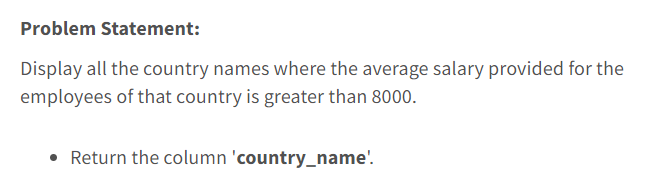

In [7]:
pd.read_sql_query('''



SELECT 
    c.country_name
FROM employees e
JOIN departments d
ON e.department_id = d.department_id 
JOIN locations l 
ON d.location_id = l.location_id
JOIN countries c
ON l.country_id = c.country_id
GROUP BY c.country_name
HAVING AVG(e.salary) >= 8000


''', conn)

,country_name
0,Germany


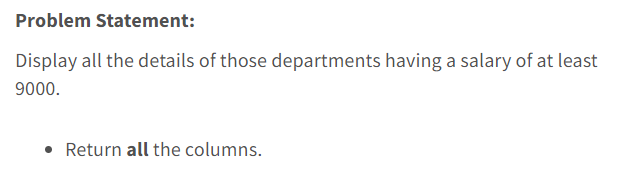

In [8]:
pd.read_sql_query('''


SELECT 
    d.department_id,
    d.department_name,
    d.manager_id,
    d.location_id
FROM employees e
JOIN departments d
ON e.department_id = d.department_id 
GROUP BY d.department_id
HAVING MIN(e.salary) >= 9000


''', conn)

,department_id,department_name,manager_id,location_id
0,70,Public Relations,204,2700
1,90,Executive,100,1700


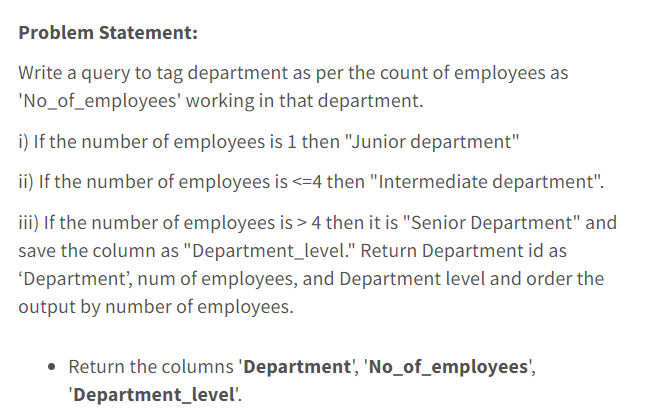

In [9]:
pd.read_sql_query('''


SELECT 
    department_id AS Department,
    COUNT(*) AS No_of_employees,
    CASE 
        WHEN COUNT(*) = 1
        THEN 'Junior Department'
        WHEN COUNT(*) <= 4
        THEN 'Intermediate Department'
        WHEN COUNT(*) > 4 
        THEN 'Senior Department'
    END AS Department_level
FROM employees 
GROUP BY department_id
ORDER BY No_of_employees


''', conn)

,Department,No_of_employees,Department_level
0,10.0,1,Junior Department
1,40.0,1,Junior Department
2,70.0,1,Junior Department
3,NaN,1,Junior Department
4,20.0,2,Intermediate Department
5,110.0,2,Intermediate Department
6,90.0,3,Intermediate Department
7,60.0,5,Senior Department
8,100.0,6,Senior Department
9,30.0,6,Senior Department


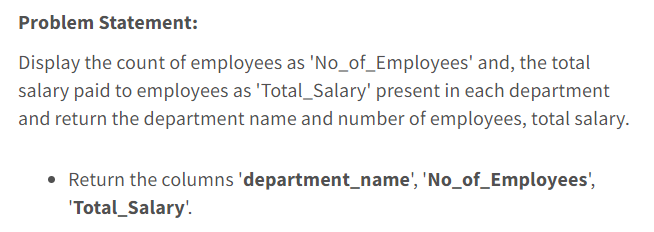

In [10]:
pd.read_sql_query('''


SELECT 
    department_name,
    COUNT(*) AS No_of_Employees,
    SUM(e.salary) AS Total_Salary
FROM employees e
JOIN departments d
ON e.department_id = d.department_id
GROUP BY department_name

''', conn)

,department_name,No_of_Employees,Total_Salary
0,Accounting,2,20300.0
1,Administration,1,4400.0
2,Executive,3,59000.0
3,Finance,6,51600.0
4,Human Resources,1,6500.0
5,IT,5,28800.0
6,Marketing,2,19000.0
7,Public Relations,1,10000.0
8,Purchasing,6,24900.0
9,Sales,34,304500.0


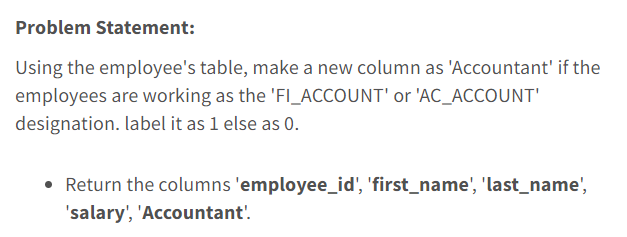

In [11]:
pd.read_sql_query('''


SELECT 
    employee_id,
    first_name,
    last_name,
    salary,
    CASE
        WHEN job_id IN ('FI_ACCOUNT' , 'AC_ACCOUNT')
        THEN 1
        ELSE 0
    END AS Accountant
FROM employees



''', conn)

,employee_id,first_name,last_name,salary,Accountant
0,100,Steven,King,25000,0
1,101,Neena,Kochhar,17000,0
2,102,Lex,De Haan,17000,0
3,103,Alexander,Hunold,9000,0
4,104,Bruce,Ernst,6000,0
...,...,...,...,...,...
102,202,Pat,Fay,6000,0
103,203,Susan,Mavris,6500,0
104,204,Hermann,Baer,10000,0
105,205,Shelley,Higgins,12000,0
